Vamos a generar un dataset basado en dataset **toy** como el que se usa habitualmente para modelos seq2seq (**inversion de secuencias numericas**). Esta explorarion nos servira para probar codificadores y decodificadores sin necesidad de usar datos complejos.

 

---

## Objetivos del Notebook

- Generar un dataset de pares `(input_sequence, target_sequence)` donde `target = input[::-1]`
- Explorar tamaño, estructura y representacion de los datos.
- Verificar codificacion  en tensores y preparar para entrenamiento posterior.

---

Un dataset toy es un conjunto de datos simples, pequeño y sistetico creado para entender o probar un modelo o algoritmo sin complicaciones.

Para este caso sera un conjunto de secuencias numericas simples para probar como el modelo puede aprender a invertir secuencias.

### Por que es importante que el modelo aprenda a invertir secuencias?

Porque esto obliga al modelo a:

- Leer una secuencia de longitud variable
- Recordar la informacion de cada paso mientras procesa la secuencia
- Generar una salida que depende de toda la entrada, pero en orden inverso

Esto nos ayuda a:

- Evaluar la capacidad de la red para capturar dependencias a largo plazo (recordar el principio de la secuencia hasta que llegue al final).
- Probar como la red maneja secuencias variables y la generacion paso a paso en salida.

Aprender esta tarea indica que la red puede manejar dependencias temporales, algo crucial en aplicaciones reales como traduccion, resumen, o reconocimiento de voz.

In [6]:
# 1. Librerias
import random
import numpy as np
#import matplotlib.pyplot as plt

# 2. Parametros del dataset

VOCABULARIO = list("0123456789") # Digitos de 0 a 9
SEED = 42 # Semilla para reproducibilidad
random.seed(SEED) 

SEQ_LEN = 7 # Longitud maxima de la secuencia
N_EJEMPLOS = 1000 # Numero de pares de datos

# 3. Funciones de utilidades

def generar_par():
    longitud = random.randint(3, SEQ_LEN) # Longitud aleatoria entre 3 y SEQ_LEN
    entrada = [random.choice(VOCABULARIO) for _ in range(longitud)] # Secuencia aleatoria
    objetivo = entrada[::-1] # Secuencia invertida
    return entrada, objetivo

def codificar(secuencia, vocab):
    return [vocab.index(c) for c in secuencia] # Codifica la secuencia como indices

def mostrar_ejemplos(datos, n = 5):
    for i in range(n):
        entrada, objetivo = datos[i]
        print(f"Entrada: {''.join(entrada)} -> Objetivo: {''.join(objetivo)}")

# 4. Generacion del dataset

datos = [generar_par() for _ in range(N_EJEMPLOS)] # Genera 1000 pares de datos

# Mostrar algunos ejemplos
print("Ejemplos de secuencias:")
mostrar_ejemplos(datos)

Ejemplos de secuencias:
Entrada: 043 -> Objetivo: 340
Entrada: 2181 -> Objetivo: 1812
Entrada: 6001338 -> Objetivo: 8331006
Entrada: 0838637 -> Objetivo: 7368380
Entrada: 4026542 -> Objetivo: 2456204


In [7]:
# 5. Construir vocabulario y codificar datos

# Agregamos tokens especiales
tokens_especiales = ['<pad>', '<sos>', '<eos>']
vocab = tokens_especiales + VOCABULARIO # Vocabulario completo
print(f"\n Vocabulario Final: {vocab}")


 Vocabulario Final: ['<pad>', '<sos>', '<eos>', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


In [8]:
# Codificamos algunos ejemplos
ejemplo_codificado = [
    (
        codificar(["<sos>"] + entrada + ["<eos>"], vocab),  # Codifica la entrada
        codificar(["<sos>"] + objetivo + ["<eos>"], vocab) # Codifica el objetivo
    )
    for entrada, objetivo in datos[:5]
]

print("\nEjemplos codificados (idx):")
for inp, out in ejemplo_codificado:
    print(f"Entrada: {inp} -> Objetivo: {out}")




Ejemplos codificados (idx):
Entrada: [1, 3, 7, 6, 2] -> Objetivo: [1, 6, 7, 3, 2]
Entrada: [1, 5, 4, 11, 4, 2] -> Objetivo: [1, 4, 11, 4, 5, 2]
Entrada: [1, 9, 3, 3, 4, 6, 6, 11, 2] -> Objetivo: [1, 11, 6, 6, 4, 3, 3, 9, 2]
Entrada: [1, 3, 11, 6, 11, 9, 6, 10, 2] -> Objetivo: [1, 10, 6, 9, 11, 6, 11, 3, 2]
Entrada: [1, 7, 3, 5, 9, 8, 7, 5, 2] -> Objetivo: [1, 5, 7, 8, 9, 5, 3, 7, 2]


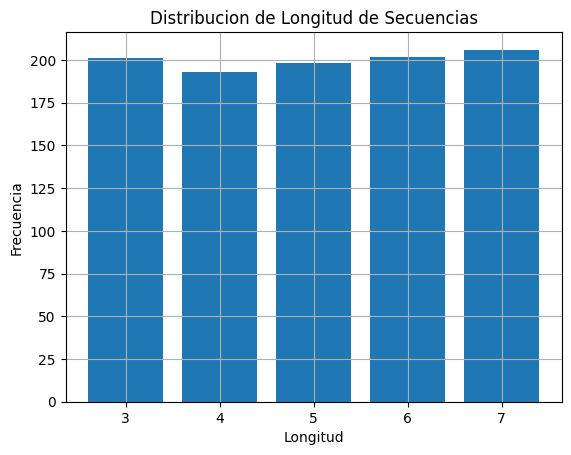


 Total de ejemplos: 1000
Longitud promedio de las entradas: 5.02
Longitud minima : 3
Longitud maxima : 7


In [ ]:
# 6. Estadisticas del dataset
longitudes = [len(p[0]) for p in datos] # Longitudes de las entradas
plt.hist(longitudes, bins=range(3, SEQ_LEN + 2), align='left', rwidth=0.8)
plt.title("Distribucion de Longitud de Secuencias")
plt.xlabel("Longitud")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

print(f"\n Total de ejemplos: {len(datos)}")
print(f"Longitud promedio de las entradas: {np.mean(longitudes):.2f}")
print(f"Longitud minima : {min(longitudes)}")
print(f"Longitud maxima : {max(longitudes)}")

In [4]:
import pickle
import os

# Codificamos todas las secuencias
datos_codificados = [
    (
        codificar(["<sos>"] + entrada + ["<eos>"], vocab),
        codificar(["<sos>"] + objetivo + ["<eos>"], vocab)
    )
    for entrada, objetivo in datos
]

# Crear carpeta si no existe
os.makedirs("data", exist_ok=True)

# Guardar en un archivo .pkl
ruta_salida = "../data/datasetToy.pkl"
with open(ruta_salida, "wb") as f:
    pickle.dump({
        "datos": datos_codificados,
        "vocab": vocab
    }, f)

print(f"\n Dataset guardado en: {ruta_salida}")


 Dataset guardado en: ../data/datasetToy.pkl


In [5]:
import pickle

# Abre el archivo en modo lectura binaria
with open('../data/datasetToy.pkl', 'rb') as f:
    contenido = pickle.load(f)

# Muestra el contenido
print(contenido)


{'datos': [([1, 3, 7, 6, 2], [1, 6, 7, 3, 2]), ([1, 5, 4, 11, 4, 2], [1, 4, 11, 4, 5, 2]), ([1, 9, 3, 3, 4, 6, 6, 11, 2], [1, 11, 6, 6, 4, 3, 3, 9, 2]), ([1, 3, 11, 6, 11, 9, 6, 10, 2], [1, 10, 6, 9, 11, 6, 11, 3, 2]), ([1, 7, 3, 5, 9, 8, 7, 5, 2], [1, 5, 7, 8, 9, 5, 3, 7, 2]), ([1, 8, 4, 4, 9, 2], [1, 9, 4, 4, 8, 2]), ([1, 8, 8, 12, 2], [1, 12, 8, 8, 2]), ([1, 3, 10, 11, 4, 9, 2], [1, 9, 4, 11, 10, 3, 2]), ([1, 11, 7, 12, 2], [1, 12, 7, 11, 2]), ([1, 12, 6, 4, 3, 6, 2], [1, 6, 3, 4, 6, 12, 2]), ([1, 4, 6, 4, 9, 7, 2], [1, 7, 9, 4, 6, 4, 2]), ([1, 8, 5, 8, 8, 6, 7, 2], [1, 7, 6, 8, 8, 5, 8, 2]), ([1, 12, 5, 11, 2], [1, 11, 5, 12, 2]), ([1, 5, 10, 9, 7, 2], [1, 7, 9, 10, 5, 2]), ([1, 6, 8, 3, 6, 3, 8, 9, 2], [1, 9, 8, 3, 6, 3, 8, 6, 2]), ([1, 4, 6, 12, 8, 6, 2], [1, 6, 8, 12, 6, 4, 2]), ([1, 9, 10, 5, 7, 5, 6, 2], [1, 6, 5, 7, 5, 10, 9, 2]), ([1, 11, 7, 12, 9, 12, 9, 8, 2], [1, 8, 9, 12, 9, 12, 7, 11, 2]), ([1, 5, 11, 10, 4, 2], [1, 4, 10, 11, 5, 2]), ([1, 4, 5, 5, 2], [1, 5, 5, 4, 2]),